# Decision Trees

Based on code example of "An Introduction to Machine Learning with Python" by A.C. Muller and S. Guido (O'Reilly).
Adapted by M. Eirinaki.


In this example you will see how we can use the DecisionTreeClassifier library to induce a tree, and how to use the graphviz package to draw the trained model. 

In [1]:
%matplotlib inline

import numpy as np
import scipy as sp
from sklearn.tree import DecisionTreeClassifier #This is the library that implements the Decision Tree classifier 
from sklearn.model_selection import train_test_split #used to split the dataset into training and test data

import matplotlib.pyplot as plt

For this example we will use the cancer dataset, that includes readings of several attributes related to a tumor and classifies the tumor to benign or malignant.

We begin by loading and exploring the dataset. 

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): {}".format(cancer.keys()))

cancer.keys(): dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [3]:
#print the shape of the dataset
print("Shape of cancer data: {}".format(cancer.data.shape))


Shape of cancer data: (569, 30)


In [4]:
print("Sample counts per class:\n{}".format(
      {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

Sample counts per class:
{'malignant': 212, 'benign': 357}


In [5]:
print("Feature names:\n{}".format(cancer.feature_names))

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


#### Controlling complexity of Decision Trees

Let's build the entire decision tree with no stopping criterion or pre-pruning condition (i.e. tree induction stops when no other splits are possible).

We start by creating a training and test set by using stratification (it's a statistical sampling technique that ensures that all classes are represented in the sample. For more details you may refer here: https://en.wikipedia.org/wiki/Stratified_sampling or your books).

In [6]:
cancer = load_breast_cancer()
#split into training and test data
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=0)

#build the tree using the training data
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

#Print accuracy of the model
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train))) #using DecisionTreeClassifier method for accuracy
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.902


### Homework Assignment

Update this section for your homework assignment. 

In [ ]:
##Update 1: Use entropy as your purity criterion

tree1 = 

#Print accuracy on training and test set




In [ ]:
##Update 2: Stopping criteria: stop splitting using min impurity threshold

tree2 = 

#Print accuracy on training and test set



In [ ]:
##Update 3: Stopping criteria: stop splitting using minimum number of instances in node

tree3 = 

#Print accuracy on training and test set



The tree achieves perfect accuracy for the training set, as expected. However, we want to have trees that generalize well for unseen data. Let's try some pre-prunning to see how it improves the accuracy in the test set.

In [ ]:
#Build the tree again setting a pre-pruning criterion for maximum depth. See how different depths affect the accuracies.
#Run for depths ranging from 3 to fully grown tree and report the accuracies. Include in comments which one is the best decision to avoid overfitting.
#The code below is your baseline (fully grown tree)

tree4 = DecisionTreeClassifier(max_depth=None, random_state=0, criterion = 'entropy')
tree4.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree4.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree4.score(X_test, y_test)))


#insert code for shorter trees here





##### \end of homework assignment 

(Use the code below to visualize and analyze your trees)

### Visualization of Decision Trees

To visualize the tree we need to use an external (non Python) package, called graphviz. You will need to install graphviz to your computer for this part of code to work. 
(Note that this will visualize the original tree. If you want to visualize the pruned tree you need to update the tree variable name accordingly)

In [7]:
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=True, filled=True)

In [8]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
  
graphviz.Source(dot_graph).render()


'Source.gv.pdf'

#### Feature Importance in trees

Finally, let's get some insights on the tree by looking closer on the different features and their importance in the prediction process. 

"Feature importance" summary rates how important each feature is for the decision a tree makes. It's a number between 0 and 1 for each feature, where 0 means "not used at all" and 1 means "perfectly predicts the target". The feature importances always sum to 1.

In [9]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.         0.02831198 0.         0.         0.         0.
 0.         0.         0.01101841 0.         0.01223453 0.
 0.         0.00999282 0.         0.         0.         0.00668975
 0.         0.         0.03687207 0.03710758 0.72534081 0.
 0.01433518 0.         0.00401385 0.10516335 0.         0.00891967]


We can also visualize the feature importances, as follows:

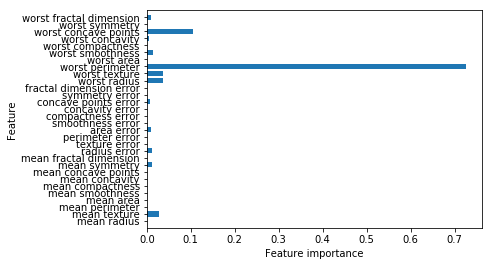

In [10]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)